In [1]:
# To train call 'neat_train.py' with arguments.
!python neat_train.py -h

usage: neat_train.py [-h] [-d DEFAULT] [-p HYPERPARAM] [-o OUTPREFIX]
                     [-n NUM_WORKER]

Evolve NEAT networks

options:
  -h, --help            show this help message and exit
  -d DEFAULT, --default DEFAULT
                        default hyperparameter file
  -p HYPERPARAM, --hyperparam HYPERPARAM
                        hyperparameter file
  -o OUTPREFIX, --outPrefix OUTPREFIX
                        file name for result output
  -n NUM_WORKER, --num_worker NUM_WORKER
                        number of cores to use


In [2]:
# Train using default NEAT parameters on cart-pole swing-up with a small population and few generations
# !cat p/quickTest.json
# !python neat_train.py -p p/quickTest.json

In [3]:
# Train using default parameter set used for training on an M1 MacBook pro. These hyperparameters work for both NEAT and WANN approaches.
!cat p/laptop_ants.json
!python neat_train.py -p p/laptop_ants.json -o ants -n 5

{
    "task":"ant_dynamics",
    "maxGen": 512,
    "popSize": 32,
    "alg_speciate": "none",
    "alg_act": 0,
    "alg_nReps": 3,
    "prob_initEnable": 0.7,
    "prob_addConn": 0.45,
    "prob_addNode": 0.33,
    "prob_enable": 0.1,
    "prob_mutAct": 0.05,
    "alg_probMoo": 0.4,
    "prob_crossover": 0.0,
    "select_eliteRatio": 0.05,
    "select_tournSize": 4,
    "bestReps": 16
}['mpirun', '-np', '6', '--oversubscribe', '/opt/homebrew/Caskroom/miniforge/base/envs/wannts/bin/python', 'neat_train.py', '-p', 'p/laptop_ants.json', '-o', 'ants', '-n', '5']
	*** Running with hyperparameters:  p/laptop_ants.json 	***
	*** Running with hyperparameters:  p/laptop_ants.json 	***
	*** Running with hyperparameters:  p/laptop_ants.json 	***
	*** Running with hyperparameters:  p/laptop_ants.json 	***
	*** Running with hyperparameters:  p/laptop_ants.json 	***
	*** Running with hyperparameters:  p/laptop_ants.json 	***
[]
2024-06-12 20:23:13,318 [INFO] In /Users/michael/Library/CloudStorage/

Text(0, 0.5, 'Fitness')

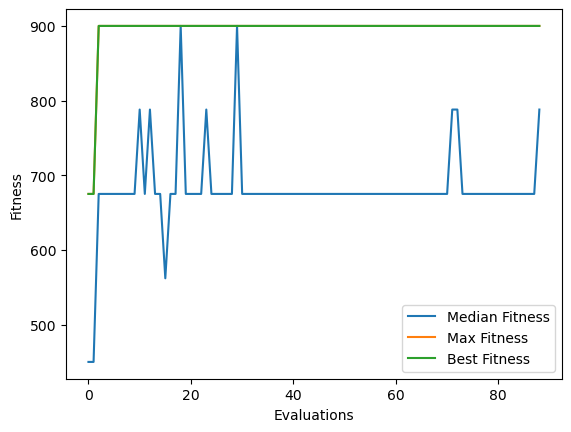

In [7]:
# -- View stats of a completed run
# Rows:
# 0 - Fitness evaluations used
# 1 - Median fitness of population
# 2 - Max fitness of population
# 3 - Top fitness every achieved
# 4 - Median number of nodes of individuals in population
# 5 - Median number of connections of individuals in population
from matplotlib import pyplot as plt
import numpy as np
exp_prefix = 'ants'
stats = np.loadtxt('log/' + exp_prefix + '_stats.out', delimiter=',')
fig, ax = plt.subplots()
x = stats[:,0]
y = stats[:,[1,2,3]]
plt.plot(y)
plt.legend(['Median Fitness','Max Fitness','Best Fitness'])
plt.xlabel('Evaluations')
plt.ylabel('Fitness')

0088.out
# of Connections in ANN:  60
# of Connections in ANN:  60


/opt/homebrew/Caskroom/miniforge/base/envs/wannts/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

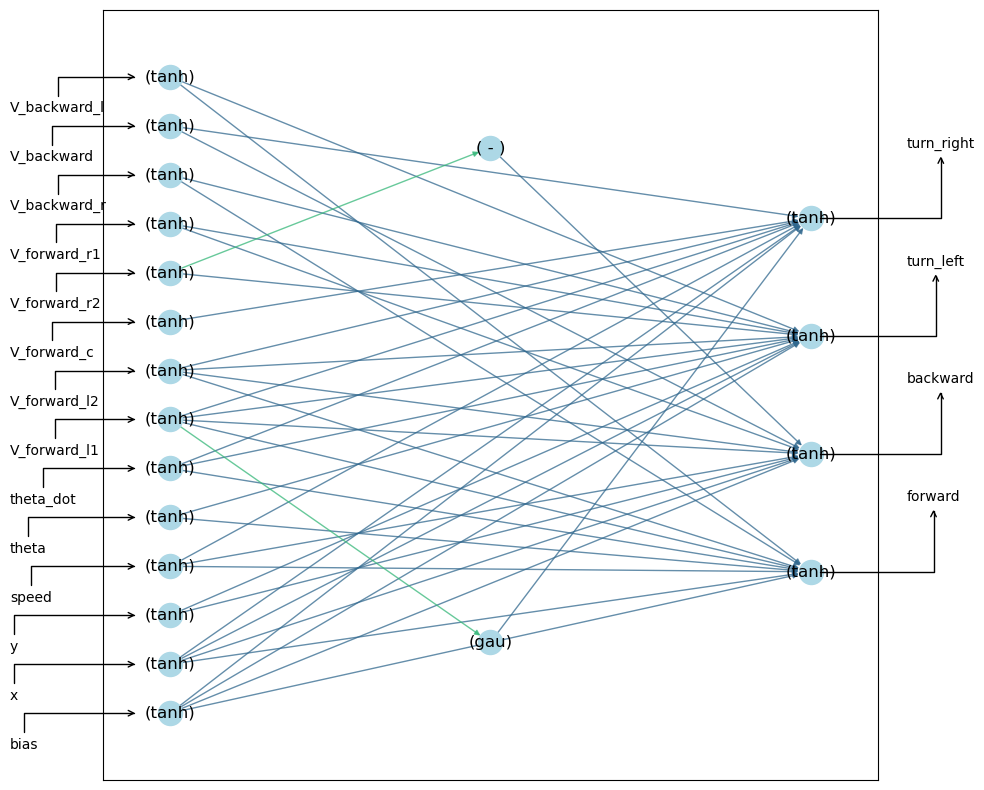

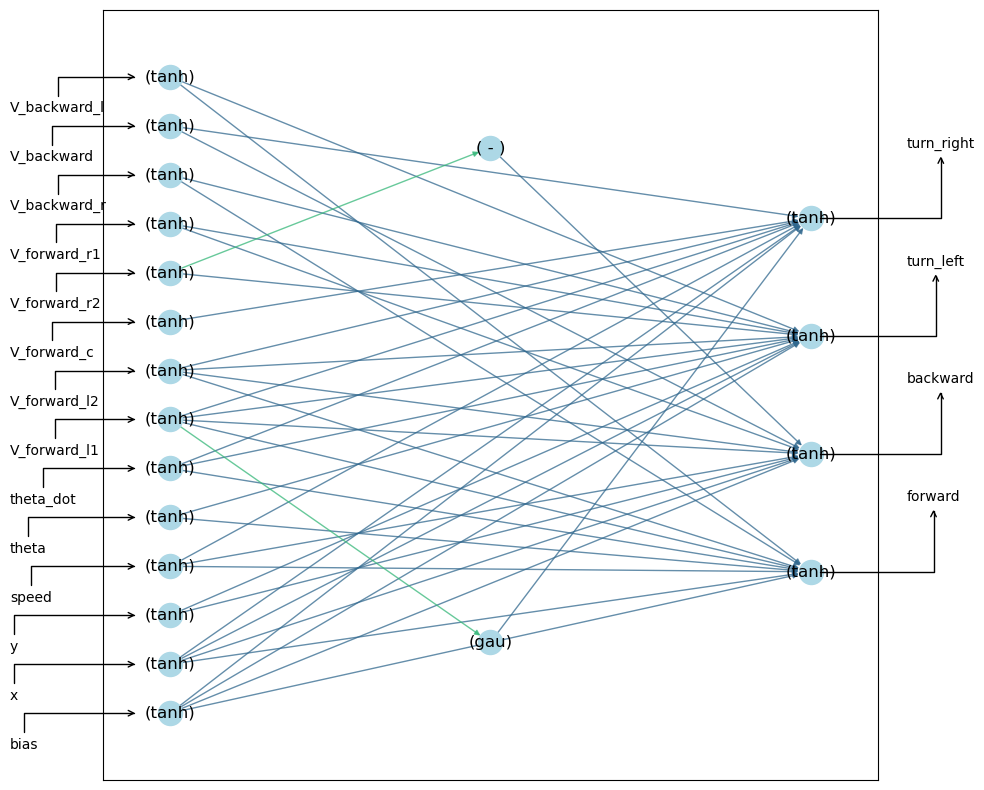

In [8]:
# -- View Topology of Network
# Lighter color connections are connected to earlier layers (NOT weight strength)
import os
import vis as nv

def find_max_out_file_number(directory):
    # List all files in the specified directory
    files = os.listdir(directory)

    # Filter out files with the .out extension and extract their numerical part
    out_file_numbers = [
        filename.split('.')[0] for filename in files if filename.endswith('.out')\
                                                          and filename.split('.')[0].isdigit()
    ]

    # Find the maximum file number if there are any .out files
    if out_file_numbers:
        return sorted(out_file_numbers)[-1]
    else:
        return "No '.out' files found in the directory."

# Specify the directory you want to search in
max_file_num = find_max_out_file_number('log/' + exp_prefix + '_best/')
print(max_file_num + '.out')
nv.viewInd('log/{0}_best/{1}.out'.format(exp_prefix, "0008"), 'ant_dynamics')
nv.viewInd('log/{0}_best/{1}.out'.format(exp_prefix, max_file_num), 'ant_dynamics')

In [9]:
# -- View Behavior of Network
# !python neat_test.py -p p/laptop_slime.json -i log/slimevolley-neat-laptop_best.out -r 3 --view True
max_file_num = find_max_out_file_number('log/' + exp_prefix + '_best/')
print('Latest:', max_file_num)
!pwd
!python neat_test.py -p p/laptop_ants.json -i log/{exp_prefix}_best/{max_file_num}.out -r 1 --view True
# --gif False

Latest: 0088
/Users/michael/Library/CloudStorage/Dropbox/Workspace/projects/ants/AntDynamics-gymnasium
	*** Running with hyperparameters:  p/laptop_ants.json 	***
2024-06-12 21:59:25,744 [INFO] In /Users/michael/Library/CloudStorage/Dropbox/Workspace/projects/ants/AntDynamics-gymnasium/domain/ant_dynamics.py:81:
Processed data file found: KA050_processed_10cm_5h_20230614.pkl.xz
^C
Traceback (most recent call last):
  File "/Users/michael/Library/CloudStorage/Dropbox/Workspace/projects/ants/AntDynamics-gymnasium/neat_test.py", line 69, in <module>
    main(args)                             
    ^^^^^^^^^^
  File "/Users/michael/Library/CloudStorage/Dropbox/Workspace/projects/ants/AntDynamics-gymnasium/neat_test.py", line 32, in main
    fitness[:] = task.getFitness(wVec, aVec, view=view, nRep=nRep)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/michael/Library/CloudStorage/Dropbox/Workspace/projects/ants/AntDynamics-gymnasium/domain/task_gym.py", line 